# Get a set of basemaps

- TRBD
- VTR
- TR
- ABQ
- ABQ-NW
- NV

In [180]:
from shapely.geometry import Polygon, Point 
%matplotlib inline 
import matplotlib.pyplot as plt
import contextily as ctx
from pyproj import CRS
import geopandas as gpd
import rasterio
from rasterio.plot import show as rioshow
from shapely.geometry import box

In [181]:
ABQ_BB_COORDS = [
         (-106.751404, 35.024374),
         (-106.751404, 35.227111),
         (-106.451340, 35.227111),
         (-106.451340, 35.024374),
]

poly = Polygon(ABQ_BB_COORDS)

abq = gpd.GeoDataFrame(geometry=[poly])

abq = abq.set_crs(CRS.from_epsg(4269))
abq.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [182]:
west, south, east, north = bbox = abq.total_bounds
bbox

array([-106.751404,   35.024374, -106.45134 ,   35.227111])

In [183]:
providers = [
    (ctx.providers.OpenTopoMap, "../../images/oto.tif"),
    (ctx.providers.OpenStreetMap.Mapnik, "../../images/osm_mn.tif"), 
    (ctx.providers.OpenStreetMap.HOT, "../../images/abq_hot.tif"),
    (ctx.providers.CartoDB.Positron, "../../images/abq_cdbp.tif"),
    (ctx.providers.CartoDB.Voyager, "../../images/abq_cdbv.tif"),
    (ctx.providers.Esri.NatGeoWorldMap, "../../images/abq_ngwm.tif"),
    (ctx.providers.Esri.WorldPhysical, "../../images/abq_esri_wp.tif"),
    (ctx.providers.Esri.WorldStreetMap, "../../images/abq_esri_ws.tif"),
    (ctx.providers.Esri.WorldImagery, "../../images/abq_esri_wi.tif"),
    (ctx.providers.Esri.WorldTerrain, "../../images/abq_esri_wt.tif"),
    (ctx.providers.Esri.WorldTopoMap, "../../images/abq_esri_wtopo.tif"),
]

In [184]:
for provider, path in providers:
    img, ext = ctx.bounds2raster(west,
                                 south,
                                 east,
                                 north,
                                 path,
                                 ll=True, 
                                 source=provider
                                )

/home/biscotty/ProjectLocal/VTR/venvDir/lib/python3.12/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 12 is not valid for the current tile provider (valid zooms: 0 - 8).
  warnings.warn(msg)


OpenTopoMap


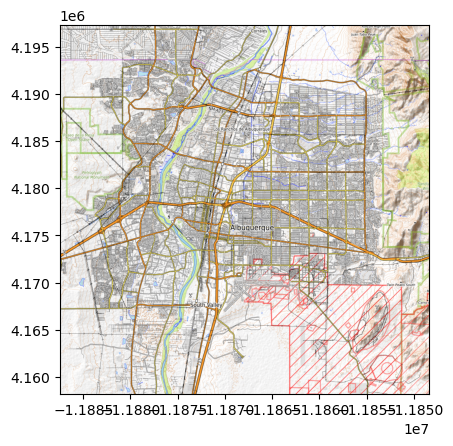

OpenStreetMap.Mapnik


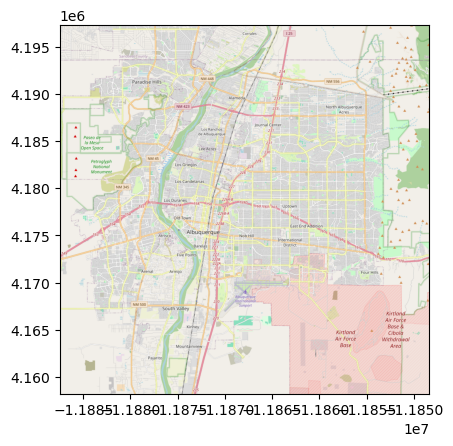

OpenStreetMap.HOT


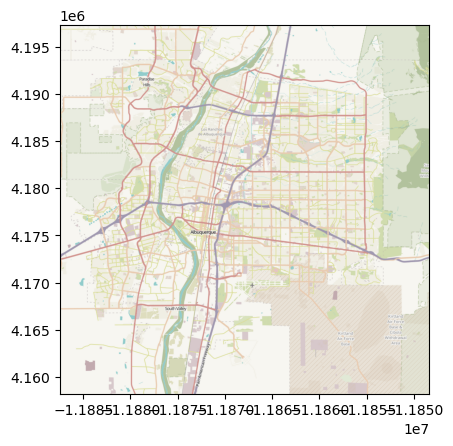

CartoDB.Positron


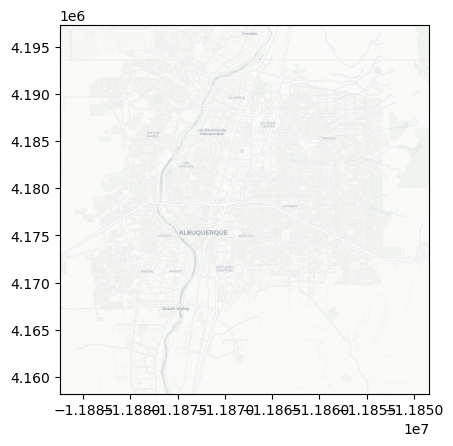

CartoDB.Voyager


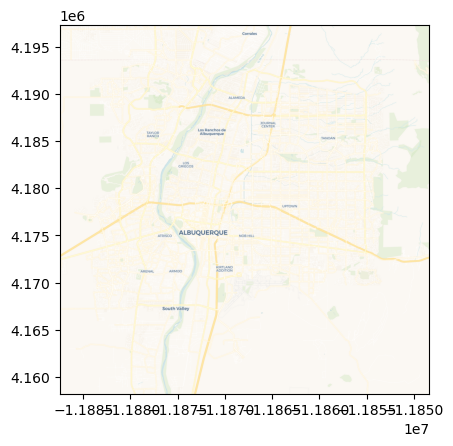

Esri.NatGeoWorldMap


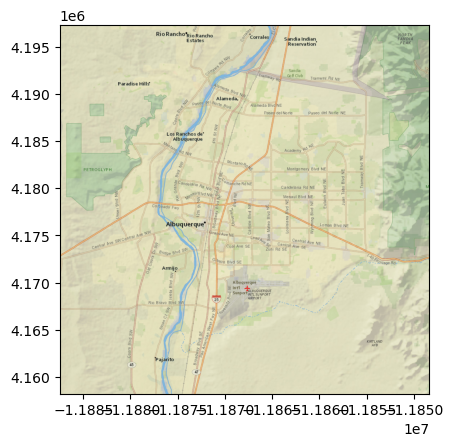

Esri.WorldPhysical


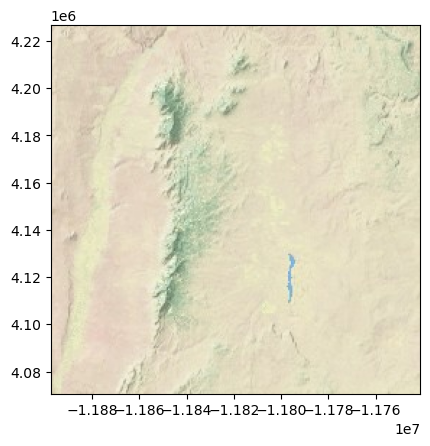

Esri.WorldStreetMap


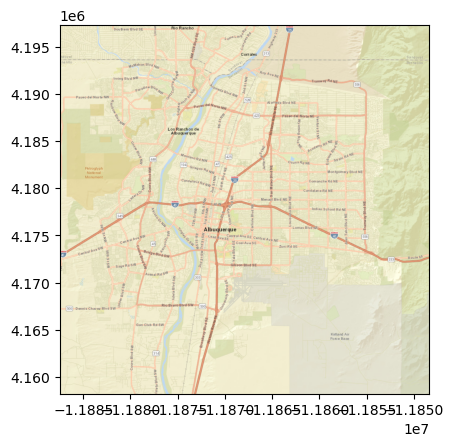

Esri.WorldImagery


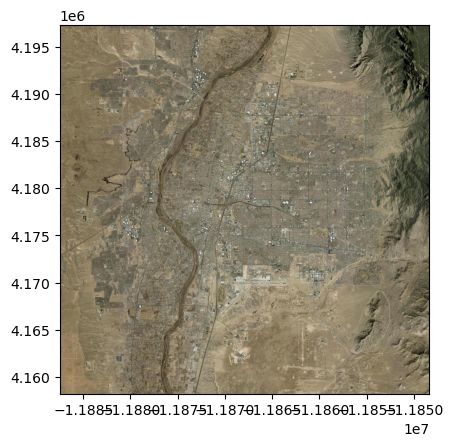

Esri.WorldTerrain


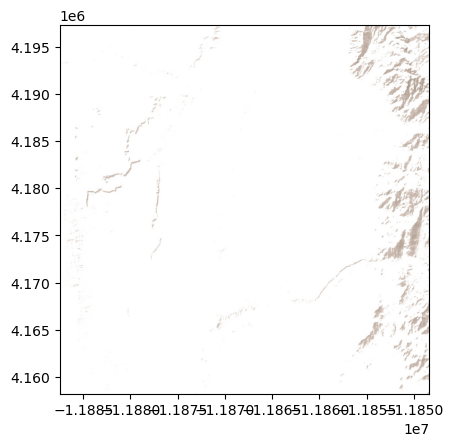

Esri.WorldTopoMap


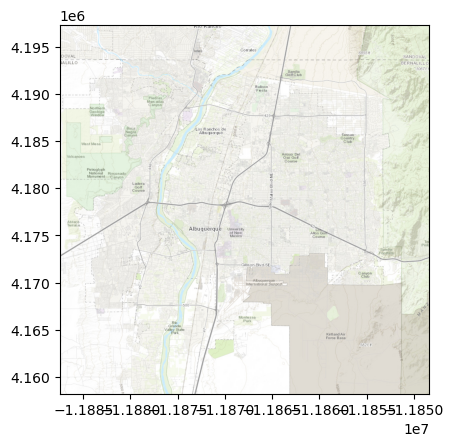

In [185]:
for pro, path in providers:
    with rasterio.open(path) as r:
        print(pro.name)
        rioshow(r)

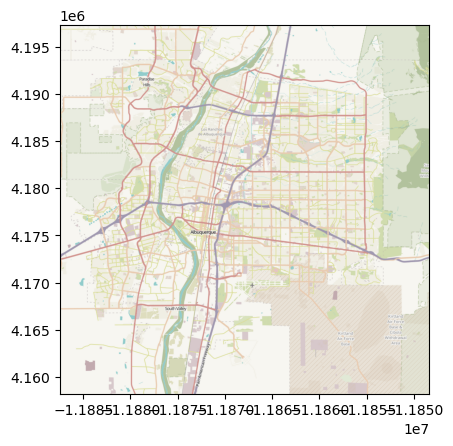

In [186]:
abq_im_path = "../../images/abq.tif"
with rasterio.open(abq_im_path) as r:
    rioshow(r)

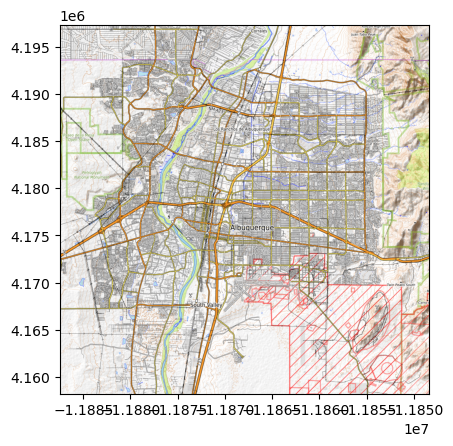

In [187]:
with rasterio.open("../../images/abq_otopo.tif") as f:
    rioshow(f)

In [188]:
abq.to_file("../../data/abq_base.shp")

In [192]:
abq.to_file("../../data/local/abq_base.shp")